<table style="width:100%; border:none; font-family: Arial, sans-serif;">
  <tr>
    <td style="width:120px;">
      <img src="./images/logo.png" alt="Logo ENSAJ" width="100" style="display:block; margin:auto;" />
    </td>
    <td style="vertical-align: middle; text-align: left; padding-left: 15px;">
      <h1 style="margin-bottom:4px; font-weight: bold; color: #2E4053;">Intention d’Achat des Acheteurs en Ligne</h1>
      <h2 style="margin-top:0; margin-bottom:6px; font-weight: normal; color: #34495E;">Entraînement des Modèles SVM et Arbre de Décision</h2>
      <p style="margin:0; font-weight: 600; color: #5D6D7E;">Ossama ETTAQAFI</p>
      <p style="margin:0; font-style: italic; color: #7F8C8D;">ENSAJ, Master SDIA - Année universitaire 2024-2025</p>
      <p style="margin-top:10px; font-size: 0.9em; color: #7F8C8D;">
        Source des données : <a href="https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset/data" target="_blank">Kaggle - Online Shoppers Purchasing Intention</a>
      </p>
    </td>
  </tr>
</table>

---

## Objectif du Notebook

Ce notebook présente la construction, l’entraînement et l’évaluation de plusieurs modèles de machine learning, notamment :  
- **Support Vector Machine (SVM)**  
- **Arbre de Décision**  
- **Random Forest**  
- **Régression Logistique**

L’objectif est de prédire l’intention d’achat des visiteurs en ligne à partir de leurs comportements de navigation.

---

## Contexte du Projet

Les données ont été prétraitées et nettoyées dans les étapes précédentes. Nous utilisons ici deux algorithmes supervisés simples mais efficaces pour comprendre la performance prédictive sur ce dataset.

---

## Objectifs du Notebook

- Charger les données réduites (`reduced_data.csv`)  
- Séparer les données en ensembles d’entraînement (`train_set.csv`) et de test (`test_set.csv`)  
- Entraîner les modèles : SVM, Arbre de Décision, Random Forest, Régression Logistique  
- Évaluer les modèles avec : 
  - Accuracy
  - F1-score
  - Matrice de confusion
  - Courbe ROC + AUC  
- Comparer les performances et exporter les prédictions pour analyse et visualisation

## Environnement

- Python 3.x  
- Bibliothèques : pandas, numpy, scikit-learn, matplotlib, seaborn, etc.

**Alors, on commence notre :**

<h1 style="text-align: center;">L'entraînement et l’évaluation des models</h1>

## 1. SVM

Évaluation du modèle SVM
Accuracy  : 0.6421
F1-score  : 0.3910

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      3127
           1       0.27      0.74      0.39       572

    accuracy                           0.64      3699
   macro avg       0.60      0.68      0.57      3699
weighted avg       0.83      0.64      0.69      3699



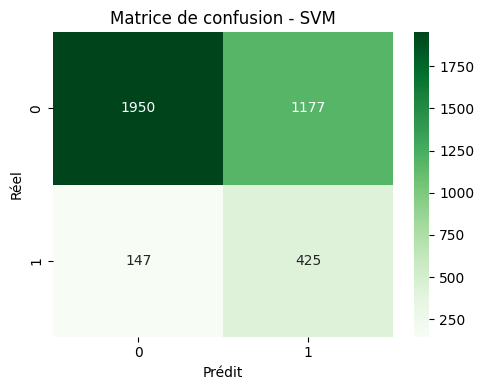

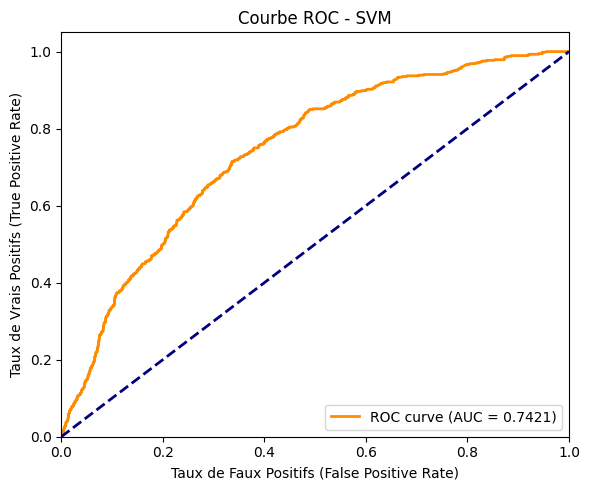

Prédictions SVM exportées dans 'predictions_svm.csv'.
Modèle SVM sauvegardé dans './models/svm_model.joblib'.


In [1]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]

X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle SVM avec gestion du déséquilibre
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# 4. Prédictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# 5. Évaluation
print("Évaluation du modèle SVM")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred, zero_division=0))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 7. Courbe ROC et AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs (False Positive Rate)")
plt.ylabel("Taux de Vrais Positifs (True Positive Rate)")
plt.title("Courbe ROC - SVM")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Exporter les prédictions dans un CSV
df_pred = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Predicted": y_pred,
    "Predicted_Probability": y_pred_proba
})

df_pred.to_csv("predictions_svm.csv", index=False)
print("Prédictions SVM exportées dans 'predictions_svm.csv'.")

# 9. Sauvegarder le modèle SVM dans le dossier 'models'
os.makedirs("models", exist_ok=True)
model_path = "./models/svm_model.joblib"
joblib.dump(svm_model, model_path)
print(f"Modèle SVM sauvegardé dans '{model_path}'.")

#### Interprétation
Le SVM n’est pas super précis dans l’ensemble, mais il a très bien détecté les acheteurs.
Même si le modèle se trompe souvent en pensant qu’un client va acheter alors que ce n’est pas vrai, il rate très peu de vrais acheteurs.

## 2. Arbre de Décision

In [ ]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]
X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle Arbre de décision avec gestion du déséquilibre
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# 4. Prédictions (classes et probabilités)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# 5. Évaluation
print("Évaluation du modèle : Arbre de décision (balanced)")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred_dt, zero_division=0):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - Arbre de décision")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 7. Courbe ROC et AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
auc_score = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.4f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Arbre de décision")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 8. Exporter les prédictions avec les données réelles et les features
df_pred_dt = X_test.reset_index(drop=True).copy()
df_pred_dt['Actual'] = y_test.reset_index(drop=True)
df_pred_dt['Prediction'] = y_pred_dt
df_pred_dt['Probability_Positive'] = y_prob_dt

df_pred_dt.to_csv('predictions_decision_tree.csv', index=False)
print("Prédictions Arbre de décision exportées dans 'predictions_decision_tree.csv'.")

# 9. Sauvegarder le modèle dans 'models/'
os.makedirs("models", exist_ok=True)
model_path = "models/decision_tree_model.joblib"
joblib.dump(dt_model, model_path)
print(f"Modèle Arbre de décision sauvegardé dans '{model_path}'.")

#### Interpretation
L’arbre de décision est assez bon sur l’ensemble (75% de précision), mais il reconnaît mal les acheteurs (seulement 29% de rappel).
Il préfère toujours dire qu’un client n’achètera pas, même quand ce n’est pas vrai.

## 3. Régression Logistique

In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]

X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle Régression Logistique avec gestion du déséquilibre
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# 4. Prédictions (classes et probabilités)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# 5. Évaluation
print("Évaluation du modèle : Régression Logistique (balanced)")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_log):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred_log, zero_division=0):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred_log, zero_division=0))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 7. Courbe ROC et AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
auc_score = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.4f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 8. Exporter les prédictions avec les données réelles et les features
df_pred_log = X_test.reset_index(drop=True).copy()
df_pred_log['Actual'] = y_test.reset_index(drop=True)
df_pred_log['Prediction'] = y_pred_log
df_pred_log['Probability_Positive'] = y_prob_log

df_pred_log.to_csv('predictions_logistic_regression.csv', index=False)
print("Prédictions Régression Logistique exportées dans 'predictions_logistic_regression.csv'.")

# 9. Sauvegarder le modèle dans 'models/'
os.makedirs("models", exist_ok=True)
model_path = "./models/logistic_regression_model.joblib"
joblib.dump(log_model, model_path)
print(f"Modèle de Régression Logistique sauvegardé dans '{model_path}'.")

#### Interprétation
Le modèle est plutôt bon pour identifier les visiteurs qui n’achètent pas (précision élevée sur la classe 0), mais il a plus de difficulté avec ceux qui achètent. Il détecte environ 69% des acheteurs (rappel correct), mais sa précision sur cette classe est faible, ce qui signifie qu’il prédit souvent des achats qui ne se réalisent pas (faux positifs). C’est un comportement fréquent avec des données déséquilibrées, où les acheteurs sont minoritaires.

## 4. Forêt Aléatoire

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Charger les datasets
train_set = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

# 2. Séparer les features (X) et la cible (y)
X_train = train_set.drop("Revenue", axis=1)
y_train = train_set["Revenue"]

X_test = test_set.drop("Revenue", axis=1)
y_test = test_set["Revenue"]

# 3. Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,        # nombre d'arbres
    max_depth=None,          # profondeur maximale (None = pas de limite)
    class_weight='balanced', # gestion du déséquilibre
    random_state=42
)
rf_model.fit(X_train, y_train)

# 4. Prédictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # probabilité classe positive

# 5. Évaluation
print("Évaluation du modèle Random Forest")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

# 6. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 7. Courbe ROC et AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs (False Positive Rate)")
plt.ylabel("Taux de Vrais Positifs (True Positive Rate)")
plt.title("Courbe ROC - Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Exporter les prédictions dans un CSV
df_pred = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Predicted": y_pred,
    "Predicted_Probability": y_pred_proba
})

df_pred.to_csv("predictions_rf.csv", index=False)
print("Prédictions Random Forest exportées dans 'predictions_rf.csv'.")

# 9. Sauvegarder le modèle Random Forest dans le dossier 'models'
os.makedirs("models", exist_ok=True)
model_path = "./models/random_forest_model.joblib"
joblib.dump(rf_model, model_path)
print(f"Modèle Random Forest sauvegardé dans '{model_path}'.")

#### Interprétation
C’est le modèle qui a la meilleure précision globale (80%), mais comme l’arbre de décision, il ne détecte pas bien les acheteurs (rappel faible de 22%).
Il est très fort pour dire quand quelqu’un n’achètera pas, mais il rate beaucoup de vrais acheteurs.